In [1]:
#importing required dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [57]:
#import our CSV

fbi_df1 = pd.read_csv("../../SQL_And_CSV/BinaryClassifier.csv")
fbi_df1

,Unnamed: 0,pub_agency_name,agency_type_name,state_name,division_name,county_name,region_name,population_group_code,offense_code,offender_race,offender_ethnicity,offender_age,offender_sex,victim_type_code,location_code,weapon_code,prop_desc_code,stolen_value,recovered_flag
0,0,Angelina,County,Texas,West South Central,ANGELINA,South,8B,26B,Unknown,Unknown,0.0,U,I,25,95,20,375.0,False
1,1,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False
2,2,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,65,0.0,False
3,3,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,13,320.0,False
4,4,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23F,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122951,151487,Polk,County,Florida,South Atlantic,POLK,South,9A,23F,Unknown,Unknown,0.0,U,B,25,95,37,10000.0,True
122952,151488,Polk,County,Florida,South Atlantic,POLK,South,9A,23F,Unknown,Unknown,0.0,U,B,25,95,36,35.0,False
122953,151489,Berkeley,County,South Carolina,South Atlantic,BERKELEY,South,9A,240,Unknown,Unknown,0.0,U,B,18,95,78,20000.0,True
122954,151490,Memphis,City,Tennessee,East South Central,SHELBY,South,1B,23F,Unknown,Unknown,0.0,U,B,7,95,2,32.0,False


In [4]:
#drop extra index
fbi_df1 = fbi_df1.drop(labels ="Unnamed: 0",axis =1)
fbi_df1.head()

,pub_agency_name,agency_type_name,state_name,division_name,county_name,region_name,population_group_code,offense_code,offender_race,offender_ethnicity,offender_age,offender_sex,victim_type_code,location_code,weapon_code,prop_desc_code,stolen_value,recovered_flag
0,Angelina,County,Texas,West South Central,ANGELINA,South,8B,26B,Unknown,Unknown,0.0,U,I,25,95,20,375.0,False
1,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False
2,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,65,0.0,False
3,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,13,320.0,False
4,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23F,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False


In [5]:
#pub_agency_name, county_name and division_name large and may confuse model. Probably not necessary as state_name and agency_type_name will give the same general info
#that is to say, COUNTY v CITY, and REGION
to_drop = ["pub_agency_name","division_name", "county_name"]
fbi_df2 = fbi_df1.drop(labels = to_drop, axis = 1)
fbi_df2.head()

,agency_type_name,state_name,region_name,population_group_code,offense_code,offender_race,offender_ethnicity,offender_age,offender_sex,victim_type_code,location_code,weapon_code,prop_desc_code,stolen_value,recovered_flag
0,County,Texas,South,8B,26B,Unknown,Unknown,0.0,U,I,25,95,20,375.0,False
1,County,Alabama,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False
2,County,Alabama,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,65,0.0,False
3,County,Alabama,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,13,320.0,False
4,County,Alabama,South,9A,23F,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False


In [6]:
#there's a lot of categorical data here. Checking for potential bucketing.
#location_code, weapon_code and prop_desc_code are all categorical despite being mostly numerical
enc = OneHotEncoder(sparse=False)

In [7]:
#copying for states name
#checking state name
states_counts = fbi_df2.state_name.value_counts()
states_counts

North Carolina          26784
Ohio                    11927
Massachusetts           10788
Texas                   10233
Georgia                  9850
Tennessee                4891
South Carolina           4596
Virginia                 4468
Michigan                 3772
Alabama                  3393
West Virginia            3383
Maryland                 2419
Nevada                   2308
Pennsylvania             2263
Missouri                 2145
Indiana                  1581
New Mexico               1518
Oregon                   1437
California               1375
Washington               1372
Colorado                 1367
New Jersey               1359
Illinois                 1350
Arkansas                 1292
Florida                  1283
Mississippi              1232
Kentucky                  804
Iowa                      531
Connecticut               388
Nebraska                  343
Rhode Island              305
Wisconsin                 283
Arizona                   278
Montana   

<AxesSubplot:ylabel='Density'>

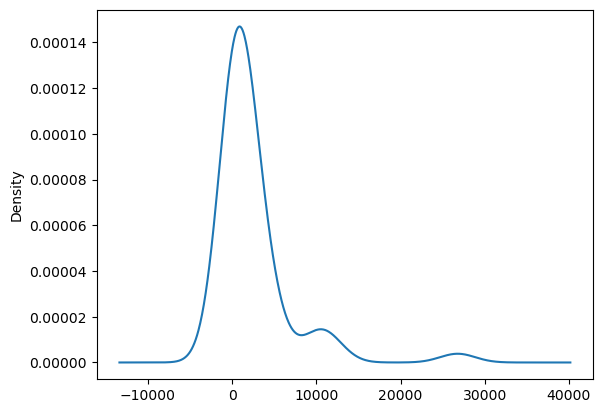

In [8]:
#check density to see where to bucket
states_counts.plot.density()

In [9]:
#let's try cutting off at 1,000 and call it "Other US States/Territories"
replacements = list(states_counts[states_counts < 1000].index)

# Replace in DataFrame
for state in replacements:
    fbi_df2.state_name = fbi_df2.state_name.replace(state,"Other_US_States/Territories")


# Check to make sure data succesfully binned
fbi_df2.state_name.value_counts()
#there must be something going on in North Carolina

North Carolina                 26784
Ohio                           11927
Massachusetts                  10788
Texas                          10233
Georgia                         9850
Tennessee                       4891
South Carolina                  4596
Other_US_States/Territories     4570
Virginia                        4468
Michigan                        3772
Alabama                         3393
West Virginia                   3383
Maryland                        2419
Nevada                          2308
Pennsylvania                    2263
Missouri                        2145
Indiana                         1581
New Mexico                      1518
Oregon                          1437
California                      1375
Washington                      1372
Colorado                        1367
New Jersey                      1359
Illinois                        1350
Arkansas                        1292
Florida                         1283
Mississippi                     1232
N

In [11]:
#now let's check agency types
agency_counts = fbi_df2.agency_type_name.value_counts()

agency_counts

City                     87166
County                   33065
State Police               877
University or College      721
Other                      658
Other State Agency         397
Tribal                      60
Federal                     12
Name: agency_type_name, dtype: int64

In [ ]:
#plan from here on out is to bucket as much as possible, then encode and run the three different model types on it. if it doesn't work, try a sigmoid model, 
#and if that doesn't accuracy, take the best model and write a report on it/how it got there. current winner is medium sized model on first data set 3-3-1 relu

<AxesSubplot:ylabel='Density'>

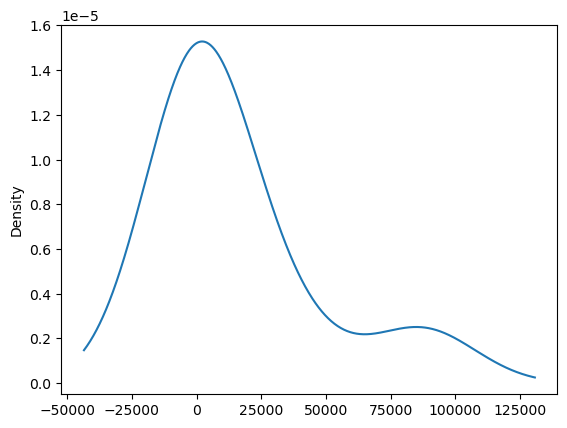

In [12]:
agency_counts.plot.density()

In [13]:
#let's try cutting off at 700 and call it "Tribal/Federal/Other
replacements = list(agency_counts[agency_counts < 700].index)

# Replace in DataFrame
for agency in replacements:
    fbi_df2.agency_type_name = fbi_df2.agency_type_name.replace(agency,"Tribal/Federal/Other")


# Check to make sure data succesfully binned
fbi_df2.agency_type_name.value_counts()
#there must be something going on in North Carolina

City                     87166
County                   33065
Tribal/Federal/Other      1127
State Police               877
University or College      721
Name: agency_type_name, dtype: int64

In [14]:
#make our target column binary for the encoder

fbi_df2.recovered_flag = fbi_df2.recovered_flag.replace({True:1,False:0})
#check to see if worked
fbi_df2.dtypes

agency_type_name          object
state_name                object
region_name               object
population_group_code     object
offense_code              object
offender_race             object
offender_ethnicity        object
offender_age             float64
offender_sex              object
victim_type_code          object
location_code              int64
weapon_code               object
prop_desc_code             int64
stolen_value             float64
recovered_flag             int64
dtype: object

In [16]:
#with an additional set of bucketing done, it's time to go ahead and make everything binary
object_columns = fbi_df2.dtypes[fbi_df2.dtypes == "object"].index.tolist()
print(object_columns)

['agency_type_name', 'state_name', 'region_name', 'population_group_code', 'offense_code', 'offender_race', 'offender_ethnicity', 'offender_sex', 'victim_type_code', 'weapon_code']


In [17]:
#Deploying the OHE produced earlier to make the conversions
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(fbi_df2[object_columns]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(object_columns)
encode_df.head()

,agency_type_name_City,agency_type_name_County,agency_type_name_State Police,agency_type_name_Tribal/Federal/Other,agency_type_name_University or College,state_name_Alabama,state_name_Arkansas,state_name_California,state_name_Colorado,state_name_Florida,...,weapon_code_20,weapon_code_30,weapon_code_35,weapon_code_40,weapon_code_50,weapon_code_70,weapon_code_85,weapon_code_90,weapon_code_95,weapon_code_99
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
#take the encoded dataframe and add it back into the original, then drop the changed columns
fbi_df2 = fbi_df2.merge(encode_df, left_index=True, right_index = True)
fbi_df2= fbi_df2.drop(labels =object_columns,axis=1)
fbi_df2.head()

,offender_age,location_code,prop_desc_code,stolen_value,recovered_flag,agency_type_name_City,agency_type_name_County,agency_type_name_State Police,agency_type_name_Tribal/Federal/Other,agency_type_name_University or College,...,weapon_code_20,weapon_code_30,weapon_code_35,weapon_code_40,weapon_code_50,weapon_code_70,weapon_code_85,weapon_code_90,weapon_code_95,weapon_code_99
0,0.0,25,20,375.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,20,77,1.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,20,65,0.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,20,13,320.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,20,77,1.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
print(fbi_df2.dtypes.value_counts())

float64    119
int64        3
dtype: int64


In [21]:
#with an additional set of bucketing done, it's time to go ahead and try some models
#SPLIT THE DATA FOR TESTING AND TRAINING
y = fbi_df2["recovered_flag"].values
X = fbi_df2.drop(labels ="recovered_flag",axis =1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=78)

In [22]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
#time to define the first new model with our slightly modified data.
#start with basic 3-3-1
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features,activation="relu"))
       
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2 ,activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 854       
                                                                 
 dense_1 (Dense)             (None, 6)                 48        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 909
Trainable params: 909
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
#Train the Model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
2882/2882 [==============================] - 4s 1ms/step - loss: 48.5115 - accuracy: 0.8109
Epoch 2/100
2882/2882 [==============================] - 3s 1ms/step - loss: 59.6593 - accuracy: 0.8022
Epoch 3/100
2882/2882 [==============================] - 3s 1ms/step - loss: 97.3897 - accuracy: 0.8002
Epoch 4/100
2882/2882 [==============================] - 3s 1ms/step - loss: 138.7034 - accuracy: 0.8055
Epoch 5/100
2882/2882 [==============================] - 3s 1ms/step - loss: 79.2328 - accuracy: 0.8152
Epoch 6/100
2882/2882 [==============================] - 3s 1ms/step - loss: 87.7117 - accuracy: 0.8317
Epoch 7/100
2882/2882 [==============================] - 3s 1ms/step - loss: 52.9449 - accuracy: 0.8391
Epoch 8/100
2882/2882 [==============================] - 3s 1ms/step - loss: 16.2572 - accuracy: 0.8284
Epoch 9/100
2882/2882 [==============================] - 3s 1ms/step - loss: 9.9617 - accuracy: 0.8077
Epoch 10/100
2882/2882 [==============================] - 3s 1ms

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
#terible horrible no good! bummer

961/961 - 1s - loss: 0.7619 - accuracy: 0.7471 - 814ms/epoch - 847us/step
Loss: 0.7618681192398071, Accuracy: 0.7470965385437012


In [32]:
#let's try the massive model out
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 6
nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features,activation="relu"))
       
# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2 ,activation="relu"))

#Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 7)                 854       
                                                                 
 dense_8 (Dense)             (None, 6)                 48        
                                                                 
 dense_9 (Dense)             (None, 6)                 42        
                                                                 
 dense_10 (Dense)            (None, 1)                 7         
                                                                 
Total params: 951
Trainable params: 951
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
fit_model = nn2.fit(X_train,y_train,epochs=100)
#re-doing forgot to change the model number on the output layer oops

Epoch 1/100
2882/2882 [==============================] - 4s 1ms/step - loss: 0.8229 - accuracy: 0.8399
Epoch 2/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3526 - accuracy: 0.8591
Epoch 3/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3473 - accuracy: 0.8591
Epoch 4/100
2882/2882 [==============================] - 4s 1ms/step - loss: 0.3481 - accuracy: 0.8592
Epoch 5/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3433 - accuracy: 0.8592
Epoch 6/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3399 - accuracy: 0.8592
Epoch 7/100
2882/2882 [==============================] - 4s 1ms/step - loss: 0.3388 - accuracy: 0.8594
Epoch 8/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3364 - accuracy: 0.8598
Epoch 9/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3373 - accuracy: 0.8598
Epoch 10/100
2882/2882 [==============================] - 4s 1ms/step - l

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
#terible horrible no good! bummer

961/961 - 1s - loss: 1.5582 - accuracy: 0.6656 - 883ms/epoch - 919us/step
Loss: 1.5582029819488525, Accuracy: 0.6656039357185364


In [37]:
#let's try a tiny model out
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 6

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features,activation="relu"))
       
# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6)                 732       
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
#trying the small model
fit_model = nn3.fit(X_train,y_train,epochs=100)

Epoch 1/100
2882/2882 [==============================] - 3s 1ms/step - loss: 32.6151 - accuracy: 0.8295
Epoch 2/100
2882/2882 [==============================] - 3s 1ms/step - loss: 8.0436 - accuracy: 0.8462
Epoch 3/100
2882/2882 [==============================] - 3s 1ms/step - loss: 29.7226 - accuracy: 0.8392
Epoch 4/100
2882/2882 [==============================] - 3s 1ms/step - loss: 7.1862 - accuracy: 0.8362
Epoch 5/100
2882/2882 [==============================] - 3s 1ms/step - loss: 10.7125 - accuracy: 0.8419
Epoch 6/100
2882/2882 [==============================] - 3s 1ms/step - loss: 6.8763 - accuracy: 0.8435
Epoch 7/100
2882/2882 [==============================] - 3s 1ms/step - loss: 5.7944 - accuracy: 0.8452
Epoch 8/100
2882/2882 [==============================] - 3s 1ms/step - loss: 7.0602 - accuracy: 0.8438
Epoch 9/100
2882/2882 [==============================] - 3s 1ms/step - loss: 18.4935 - accuracy: 0.8393
Epoch 10/100
2882/2882 [==============================] - 3s 1ms/step

In [41]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
#bad

961/961 - 1s - loss: 2.5904 - accuracy: 0.7356 - 850ms/epoch - 884us/step
Loss: 2.590409994125366, Accuracy: 0.7356127500534058


In [42]:
#let's smaller but deeper
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 4
hidden_nodes_layer2 = 3
hidden_nodes_layer3 = 3
nn5 = tf.keras.models.Sequential()

# First hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features,activation="relu"))
       
# Second hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2 ,activation="relu"))

#Third hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 488       
                                                                 
 dense_16 (Dense)            (None, 3)                 15        
                                                                 
 dense_17 (Dense)            (None, 3)                 12        
                                                                 
 dense_18 (Dense)            (None, 1)                 4         
                                                                 
Total params: 519
Trainable params: 519
Non-trainable params: 0
_________________________________________________________________


In [43]:
nn5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
fit_model = nn5.fit(X_train,y_train,epochs=100)

Epoch 1/100
2882/2882 [==============================] - 4s 1ms/step - loss: 0.5195 - accuracy: 0.8593
Epoch 2/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3660 - accuracy: 0.8593
Epoch 3/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3762 - accuracy: 0.8593
Epoch 4/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3748 - accuracy: 0.8593
Epoch 5/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3602 - accuracy: 0.8593
Epoch 6/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3586 - accuracy: 0.8593
Epoch 7/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3668 - accuracy: 0.8593
Epoch 8/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3540 - accuracy: 0.8593
Epoch 9/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3431 - accuracy: 0.8593
Epoch 10/100
2882/2882 [==============================] - 3s 1ms/step - l

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


961/961 - 1s - loss: 5.2182 - accuracy: 0.5586 - 871ms/epoch - 906us/step
Loss: 5.218200206756592, Accuracy: 0.558638870716095


In [45]:
#let's just for fun ruin this by setting all activations to sigmoid and laugh our way to the bank.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 4
hidden_nodes_layer2 = 3
hidden_nodes_layer3 = 3
nn6 = tf.keras.models.Sequential()

# First hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features,activation="sigmoid"))
       
# Second hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden_nodes_layer2 ,activation="sigmoid"))

#Third hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
# Output layer
nn6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 4)                 488       
                                                                 
 dense_20 (Dense)            (None, 3)                 15        
                                                                 
 dense_21 (Dense)            (None, 3)                 12        
                                                                 
 dense_22 (Dense)            (None, 1)                 4         
                                                                 
Total params: 519
Trainable params: 519
Non-trainable params: 0
_________________________________________________________________


In [46]:
nn6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
fit_model = nn6.fit(X_train,y_train,epochs=100)

Epoch 1/100
2882/2882 [==============================] - 4s 1ms/step - loss: 0.4094 - accuracy: 0.8593
Epoch 2/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3853 - accuracy: 0.8593
Epoch 3/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3719 - accuracy: 0.8593
Epoch 4/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3602 - accuracy: 0.8592
Epoch 5/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3573 - accuracy: 0.8593
Epoch 6/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3550 - accuracy: 0.8592
Epoch 7/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3597 - accuracy: 0.8592
Epoch 8/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3536 - accuracy: 0.8592
Epoch 9/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3532 - accuracy: 0.8594
Epoch 10/100
2882/2882 [==============================] - 3s 1ms/step - l

In [49]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn6.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


961/961 - 1s - loss: 0.6365 - accuracy: 0.3714 - 866ms/epoch - 902us/step
Loss: 0.6364541053771973, Accuracy: 0.37144994735717773


In [56]:
#Outliers in the cash value had been detected, lets filter those out?

fbi_new = fbi_df2[fbi_df2["stolen_value"] <100000]
fbi_new
#This took about 1,000 outliers out

,offender_age,location_code,prop_desc_code,stolen_value,recovered_flag,agency_type_name_City,agency_type_name_County,agency_type_name_State Police,agency_type_name_Tribal/Federal/Other,agency_type_name_University or College,...,weapon_code_20,weapon_code_30,weapon_code_35,weapon_code_40,weapon_code_50,weapon_code_70,weapon_code_85,weapon_code_90,weapon_code_95,weapon_code_99
0,0.0,25,20,375.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,20,77,1.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,20,65,0.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,20,13,320.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,20,77,1.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122951,0.0,25,37,10000.0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
122952,0.0,25,36,35.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
122953,0.0,18,78,20000.0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
122954,0.0,7,2,32.0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
#now let's do it all over again
#with an additional set of bucketing done, it's time to go ahead and try some models
#SPLIT THE DATA FOR TESTING AND TRAINING
y = fbi_new["recovered_flag"].values
X = fbi_new.drop(labels ="recovered_flag",axis =1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=78)

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [71]:
#try the balanced model again
#time to define the first new model with our slightly modified data.
#start with basic 3-3-1
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 3
hidden_nodes_layer2 = 3

nn7 = tf.keras.models.Sequential()

# First hidden layer
nn7.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features,activation="relu"))
       
# Second hidden layer
nn7.add(tf.keras.layers.Dense(units=hidden_nodes_layer2 ,activation="relu"))

# Output layer
nn7.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 3)                 366       
                                                                 
 dense_24 (Dense)            (None, 3)                 12        
                                                                 
 dense_25 (Dense)            (None, 1)                 4         
                                                                 
Total params: 382
Trainable params: 382
Non-trainable params: 0
_________________________________________________________________


In [73]:
nn7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [74]:
fit_model = nn7.fit(X_train,y_train,epochs=100)

Epoch 1/100
2853/2853 [==============================] - 4s 1ms/step - loss: 4.1736 - accuracy: 0.8383
Epoch 2/100
2853/2853 [==============================] - 3s 1ms/step - loss: 0.3688 - accuracy: 0.8612
Epoch 3/100
2853/2853 [==============================] - 3s 1ms/step - loss: 0.3564 - accuracy: 0.8615
Epoch 4/100
2853/2853 [==============================] - 3s 1ms/step - loss: 0.3539 - accuracy: 0.8617
Epoch 5/100
2853/2853 [==============================] - 3s 1ms/step - loss: 0.3514 - accuracy: 0.8621
Epoch 6/100
2853/2853 [==============================] - 3s 1ms/step - loss: 0.3533 - accuracy: 0.8620
Epoch 7/100
2853/2853 [==============================] - 3s 1ms/step - loss: 0.3496 - accuracy: 0.8621
Epoch 8/100
2853/2853 [==============================] - 3s 1ms/step - loss: 0.3491 - accuracy: 0.8622
Epoch 9/100
2853/2853 [==============================] - 3s 1ms/step - loss: 0.3527 - accuracy: 0.8622
Epoch 10/100
2853/2853 [==============================] - 3s 1ms/step - l

In [75]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn7.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
#not good but it's better than had been, not as good as best model though.

951/951 - 1s - loss: 0.4653 - accuracy: 0.7678 - 845ms/epoch - 888us/step
Loss: 0.46533429622650146, Accuracy: 0.7678201794624329


In [85]:
#let's try modifying this with the additional dropped data of our earlier better dataset, and then add try the best model again on that
to_drop = ["pub_agency_name","division_name", "county_name","offender_age","offender_ethnicity","Unnamed: 0"]
fbi_last = fbi_df1.drop(labels=to_drop, axis=1)
fbi_last

,agency_type_name,state_name,region_name,population_group_code,offense_code,offender_race,offender_sex,victim_type_code,location_code,weapon_code,prop_desc_code,stolen_value,recovered_flag
0,County,Texas,South,8B,26B,Unknown,U,I,25,95,20,375.0,False
1,County,Alabama,South,9A,23H,Unknown,U,I,20,95,77,1.0,False
2,County,Alabama,South,9A,23H,Unknown,U,I,20,95,65,0.0,False
3,County,Alabama,South,9A,23H,Unknown,U,I,20,95,13,320.0,False
4,County,Alabama,South,9A,23F,Unknown,U,I,20,95,77,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122951,County,Florida,South,9A,23F,Unknown,U,B,25,95,37,10000.0,True
122952,County,Florida,South,9A,23F,Unknown,U,B,25,95,36,35.0,False
122953,County,South Carolina,South,9A,240,Unknown,U,B,18,95,78,20000.0,True
122954,City,Tennessee,South,1B,23F,Unknown,U,B,7,95,2,32.0,False


In [86]:
# re-bucket and modify

states_counts = fbi_last.state_name.value_counts()
states_counts

North Carolina          26784
Ohio                    11927
Massachusetts           10788
Texas                   10233
Georgia                  9850
Tennessee                4891
South Carolina           4596
Virginia                 4468
Michigan                 3772
Alabama                  3393
West Virginia            3383
Maryland                 2419
Nevada                   2308
Pennsylvania             2263
Missouri                 2145
Indiana                  1581
New Mexico               1518
Oregon                   1437
California               1375
Washington               1372
Colorado                 1367
New Jersey               1359
Illinois                 1350
Arkansas                 1292
Florida                  1283
Mississippi              1232
Kentucky                  804
Iowa                      531
Connecticut               388
Nebraska                  343
Rhode Island              305
Wisconsin                 283
Arizona                   278
Montana   

In [87]:
# cutting off at 1,000 and call it "Other US States/Territories"
replacements = list(states_counts[states_counts < 1000].index)

# Replace in DataFrame
for state in replacements:
    fbi_last.state_name = fbi_last.replace(state,"Other_US_States/Territories")


# Check to make sure data succesfully binned
fbi_last.state_name.value_counts()


ValueError: Columns must be same length as key